<a href="https://colab.research.google.com/github/cyclingdata/tensorflow_practice_coursera/blob/master/NLP_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-03-30 04:06:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0s      

2020-03-30 04:06:07 (182 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [9]:
model = Sequential()
model.add(Embedding(total_words, 150, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(10,return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(10)))
model.add(Dense(128,kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(total_words,activation='softmax'))
# divide lr by 2 if loss does not improve in 2 consecutive epochs
rlrop = ReduceLROnPlateau(monitor='loss',factor=0.5,patience=2)
# stop if loss has not improve in 5 consecutive epochs	
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)
# Pick an optimizer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 10, 150)           481650    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 10, 20)            12880     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 20)            0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 20)                2480      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               2688      
_________________________________________________________________
dense_7 (Dense)              (None, 3211)              414219    
Total params: 913,917
Trainable params: 913,917
Non-trainable params: 0
________________________________________________

In [10]:
 history = model.fit(predictors, label, epochs=500, verbose=1,callbacks=[rlrop,es])

Epoch 1/500
484/484 [==============================] - 7s 13ms/step - loss: 6.9372 - accuracy: 0.0224 - lr: 0.0010
Epoch 2/500
484/484 [==============================] - 7s 14ms/step - loss: 6.5233 - accuracy: 0.0237 - lr: 0.0010
Epoch 3/500
484/484 [==============================] - 7s 13ms/step - loss: 6.3960 - accuracy: 0.0294 - lr: 0.0010
Epoch 4/500
484/484 [==============================] - 6s 13ms/step - loss: 6.2768 - accuracy: 0.0350 - lr: 0.0010
Epoch 5/500
484/484 [==============================] - 7s 14ms/step - loss: 6.1739 - accuracy: 0.0378 - lr: 0.0010
Epoch 6/500
484/484 [==============================] - 7s 13ms/step - loss: 6.0720 - accuracy: 0.0399 - lr: 0.0010
Epoch 7/500
484/484 [==============================] - 7s 13ms/step - loss: 5.9714 - accuracy: 0.0447 - lr: 0.0010
Epoch 8/500
484/484 [==============================] - 7s 14ms/step - loss: 5.8649 - accuracy: 0.0509 - lr: 0.0010
Epoch 9/500
484/484 [==============================] - 7s 14ms/step - loss: 5.75

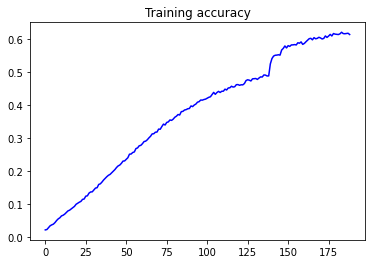

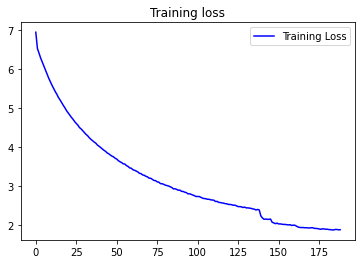

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [13]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope to thine true ' spend change possession away do me sense sense heaven's fulfil mistaking mistaking staineth staineth rolling secret bosom's tomb done do those lie tend me away one out past to way moan thee foes fuel fuel erred kill forth lease sense sense sense lease lust strange weeks weeks willing subscribes heaven's willing parts told lease confound confound confound fulfil power lease me subscribes art erred told tend tend write forth me aside dyed dyed grow enrich releasing me hill show forth me word appear appear appear crime rolling confounds how sit trust 'no ' call afloat me
